In [18]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

Using TensorFlow backend.


In [19]:
tokenizer = Tokenizer()

data = open('C:\\Users\91820\Desktop\women.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


print(total_words)


1813


In [20]:
corpus

['who are you?',
 'i am wisdom.',
 'what do you do?',
 'i study and understand women.',
 'first, are you our sort of a person?',
 'do you wear',
 'a glass eye, false teeth or a crutch,',
 'a brace or a hook,',
 'rubber breasts or a rubber crotch,',
 '',
 "stitches to show something's missing? no, no? then",
 'how can we give you a thing?',
 'stop crying.',
 'open your hand.',
 'empty? empty. here is a hand',
 '',
 'to fill it and willing',
 'to bring teacups and roll away headaches',
 'and do whatever you tell it.',
 'will you marry it?',
 'it is guaranteed',
 '',
 'to thumb shut your eyes at the end',
 'and dissolve of sorrow.',
 'we make new stock from the salt.',
 'i notice you are stark naked.',
 'how about this suit——',
 '',
 'black and stiff, but not a bad fit.',
 'will you marry it?',
 'it is waterproof, shatterproof, proof',
 'against fire and bombs through the roof.',
 "believe me, they'll bury you in it.",
 '',
 'now your head, excuse me, is empty.',
 'i have the ticket for t

In [21]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [27]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words , activation = 'relu'))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 14, 100)           181300    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_7 (Dense)              (None, 1813)              545713    
_________________________________________________________________
dense_8 (Dense)              (None, 1813)              3288782   
Total params: 4,316,995
Trainable params: 4,316,995
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(xs, ys, epochs=100, verbose=1)

Train on 4618 samples
Epoch 1/100
4618/4618 [==============================] - 13s 3ms/sample - loss: 6.8502 - accuracy: 0.0351
Epoch 2/100
4618/4618 [==============================] - 10s 2ms/sample - loss: 6.3008 - accuracy: 0.0433
Epoch 3/100
4618/4618 [==============================] - 10s 2ms/sample - loss: 5.9948 - accuracy: 0.0615
Epoch 4/100
4618/4618 [==============================] - 10s 2ms/sample - loss: 5.5057 - accuracy: 0.0855
Epoch 5/100
4618/4618 [==============================] - 10s 2ms/sample - loss: 5.7462 - accuracy: 0.1141
Epoch 6/100
4618/4618 [==============================] - 10s 2ms/sample - loss: 4.7425 - accuracy: 0.1479
Epoch 7/100
4618/4618 [==============================] - 9s 2ms/sample - loss: 4.3758 - accuracy: 0.1860
Epoch 8/100
4618/4618 [==============================] - 10s 2ms/sample - loss: 4.0124 - accuracy: 0.2172
Epoch 9/100
4618/4618 [==============================] - 10s 2ms/sample - loss: 3.7043 - accuracy: 0.2460s - loss: 3.7020 - accurac

In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

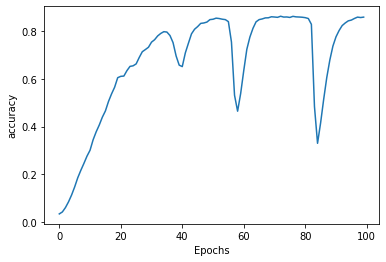

In [31]:
plot_graphs(history, 'accuracy')


In [32]:
seed_text = "why a women"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

why a women happened this is history there is more than one hangman but to be she a to be she and quarterly no and to to your to to in it with your in it can to me on the to be cows for my of my smile it has been to be who would she her under with speculating of to your mouth she didn’t she make that have you never and handclap you a be of to be in a she has been condemned to be a sickly – no more or a true in your to be sees me
